# Лабораторная работа 7

## 1. Найти шаг интегрирования h для вычисления интеграла по формуле трапеций с точностью 0.001

In [1]:
import math as math
import numpy as np
from sympy import *

eps = 0.001
a = 0
b = 1

x, y = symbols('x y')
expr = x * sin(3 * x)

d = diff(diff(expr, x), x)
plot_implicit(Eq(d, y), (x, a, b), (y, -10, 10))
d

<Figure size 640x480 with 1 Axes>

-9*x*sin(3*x) + 6*cos(3*x)

Из графика видно, что вторая производная наибольшее значение принимает при x = 0, следовательно 
**max|f\`\`(x)| = |f\`\`(0)|** 

In [2]:
f2x = abs(float(str(d.subs(x, 0))))

n = round(sqrt( (f2x * (b - a)**3) / (eps * 12) ))

while(n % 4 != 0):
    n += 1

h = (b - a) / n

print('Шаг равен: ' + str(h))

Шаг равен: 0.041666666666666664


## 2.Вычислить интеграл по формуле трапеций с шагами 2h и h. Дать уточненную оценку погрешнсти

In [3]:
def f_x(value):
    return value * math.sin(3 * value)

h2 = h * 2
n2 = int(n / 2)

sum = 0

for i in range(1, n) :
    xi = a + i * h
    sum += f_x(xi)

int_val = 0.5 * h *(f_x(a) + 2 * sum + f_x(b))

print('Значение интеграла с шагом h: ' + str(int_val))

sum = 0

for i in range(1, n2):
    xi = a + i * h2
    sum += f_x(xi)

int_val2 = 0.5 * h2 *(f_x(a) + 2 * sum + f_x(b))

print('Значение интеграла с шагом 2h: ' + str(int_val2))

print('\nУточненная погрешность(для h): ' + str((f2x * (b - a)**3) / (12 * n**2)))
print('Уточненная погрешность(для 2h): ' + str((f2x * (b - a)**3) / (12 * n2**2)))

Значение интеграла с шагом h: 0.3452681362087067
Значение интеграла с шагом 2h: 0.34403889228371864

Уточненная погрешность(для h): 0.0008680555555555555
Уточненная погрешность(для 2h): 0.003472222222222222


## 3. Вычислить интеграл по формуле Симпсона с шагами h и 2h. Дать уточненную погрешность

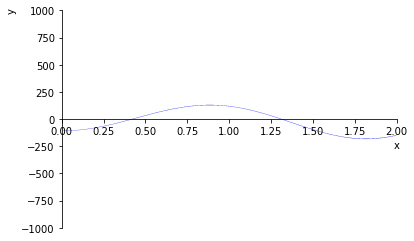

In [4]:
d4 = diff(diff(d, x), x)

plot_implicit(Eq(d4, y), (x, a, 2*b), (y, -1000, 1000))

Sympy отказался искать значения, при которых 5-ая производная будет равна нулю(экстремум 4-ой), поэтому значения взял из [wolframalpha](https://www.wolframalpha.com/input/?i=243*x*cos(3x)%2B405sin(3x)+%3D+0)

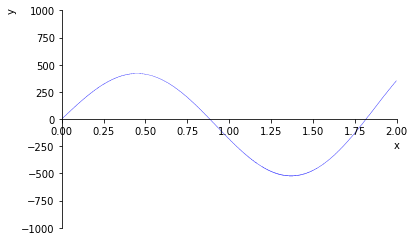

In [5]:
d5 = diff(d4, x)
# solve(Eq(d5, 0), x) 

plot_implicit(Eq(d5, y), (x, a, 2*b), (y, -1000, 1000))

In [6]:
f4x = 0.88455413318

n = round(((f4x * (b - a)**5) / (eps * 2880))**(1/4))

while(n % 4 != 0):
    n += 1
    
h = (b - a) / n 
print('Шаг равен: ' + str(h))


Шаг равен: 0.25


In [7]:
sum = 0
sum2 = 0

n = int(n / 2)

for i in range(1, n + 1):
    xi = a + (2 * i - 1) * h
    sum += f_x(xi)
    
for i in range(1, n):
    xi = a + (2 * i) * h
    sum2 += f_x(xi)

int_val3 = h / 3 * (f_x(a) + 4 * sum + 2 *sum2 + f_x(a + (2 * n) * h)) 

print('Значение интеграла с шагом h: ' + str(int_val3)) 



sum = 0
sum2 = 0

n2 = int(n / 2)
h2 = h * 2

for i in range(1, n2 + 1):
    xi = a + (2 * i - 1) * h2
    sum += f_x(xi)
    
for i in range(1, n2):
    xi = a + (2 * i) * h2
    sum2 += f_x(xi)

int_val4 = h2 / 3 * (f_x(a) + 4 * sum + 2 *sum2 + f_x(a + (2 * n2) * h2)) 

print('Значение интеграла с шагом h: ' + str(int_val4)) 

print('\nУточненная погрешность(для h): ' + str(f4x * (b - a)**5 / (2880 * (n * 2)**4)))
print('Уточненная погрешность(для 2h): ' + str(f4x * (b - a)**5 / (2880 * (n2 * 2)**4)))

Значение интеграла с шагом h: 0.3462061121125849
Значение интеграла с шагом h: 0.35601833021132934

Уточненная погрешность(для h): 1.1997533273383246e-06
Уточненная погрешность(для 2h): 1.9196053237413193e-05


## 4. Вычислить интеграл по формуле Ньютона-Лейбница. Сравнить приближенные значения интеграла с точными. Какая точная формула численного интегрирования дала более точный результат?

In [8]:
integ = integrate(expr, x)

print('Первообразная: ' + str(integ))

S_xa = float(integ.subs(x, a))
S_xb = float(integ.subs(x, b))

int_val5 = S_xb - S_xa

print('\nЗначение интеграла: ' + str(int_val5))

Первообразная: -x*cos(3*x)/3 + sin(3*x)/9

Значение интеграла: 0.34567749976235596


In [9]:
import pandas as pd

int_values = [int_val, int_val2, int_val3, int_val4, int_val5]
int_names = ['Формула трапеций (шаг h)', 'Формула трапеций (шаг 2h)',
             'Формула Симпсона (шаг h)', 'Формула Симпсона (шаг 2h)',
             'Формула Ньютона-Лейбница']
is_accurate = []

if abs(int_val - int_val5) < abs(int_val3 - int_val5):
    is_accurate = ['+', '-', '-', '-', '+']
else:
    is_accurate = ['-', '-', '+', '-', '+']
    
print(abs(int_val5 - int_val))
print(abs(int_val3 - int_val5))
    
        
d = {'Название': int_names, 
     'Значение': int_values, 
     'Является самой точной': is_accurate}

df = pd.DataFrame(data=d)

df

0.0004093635536492335
0.0005286123502289408


,Название,Значение,Является самой точной
0,Формула трапеций (шаг h),0.345268,+
1,Формула трапеций (шаг 2h),0.344039,-
2,Формула Симпсона (шаг h),0.346206,-
3,Формула Симпсона (шаг 2h),0.356018,-
4,Формула Ньютона-Лейбница,0.345677,+


## 5. Найти шаг интегрирования для решения задачи Коши методом Рунге-Кутта(4) с точностью до 10**-4

In [10]:
eps = 0.0001

y0 = 0
x0 = 1

a = 0
b = 1

h0 = eps ** (1/4)
n5 = int((b - a) / h0)


while n5 % 2 != 0:
    n5 += 1
    h0 = (b - a) / (n5)


print('n: ' + str(n5))
print('h0: ' + str(h0))

n: 10
h0: 0.1


In [11]:
def Sol_F_X(xt):
    return math.sqrt(2.0 / (math.exp(2.0 * (xt**2)) + 2.0 * (xt**2) + 1.0))

def F_X(xt, yt):
    return  2 * xt**3 * yt **3 - 2 * xt *yt

def K1(xt, yt, ht):
    return F_X(xt, yt)

def K2(xt, yt, ht, k1):
    return F_X(xt + (ht / 2), yt + ht * (k1 / 2))

def K3(xt, yt, ht, k2):
    return K2(xt, yt, ht, k2)

def K4(xt, yt, ht, k3):
    return F_X(xt + ht , yt + ht * k3)

In [12]:
y0_H = y0_H2 = y0
x0_H = x0_H2 = x0

while True:
    h = h0
    h2 = 2 * h0
    
    x0_H = x0_H2 = x0

    F1_H = K1(x0, y0, h)
    F2_H = K2(x0, y0, h, F1_H)
    F3_H = K3(x0, y0, h, F2_H)
    F4_H = K4(x0, y0, h, F3_H)
    
    
    y_H = 1 + h / 6 * (F1_H + 2 * F2_H + 2 * F3_H + F4_H) 
    
    x0_H += h 
    
    F1_H = K1(x0, y0, h)
    F2_H = K2(x0, y0, h, F1_H)
    F3_H = K3(x0, y0, h, F2_H)
    F4_H = K4(x0, y0, h, F3_H)
    
    y_H += h / 6 * (F1_H + 2 * F2_H + 2 * F3_H + F4_H) 
    
    #-----------------------------------------------
    
    F1_H2 = K1(x0, y0, h2)
    F2_H2 = K2(x0, y0, h2, F1_H2)
    F3_H2 = K3(x0, y0, h2, F2_H2)
    F4_H2 = K4(x0, y0, h2, F3_H2)

    y_H2 = 1 + h2 / 6 * (F1_H2 + 2 * F2_H2 + 2 * F3_H2 + F4_H2) 

    
    if 1 / 15 * abs(y_H - y_H2) < eps and n5 % 2 == 0:
        break
    
    n5 += 1
    h0 = (b - a) / (n5)
    
print('Шаг: ' + str(h0))
print('Количество отрезков: ' + str(n5))

Шаг: 0.1
Количество отрезков: 10


## 6. Найти решение задачи Коши на отрезке [0, 1] методом Рунге-Кутта 4-го порядка, методом Адамса 2-го порядка с точностью 10**-4. Построить приближенные интегральные кривые.

In [13]:
import pandas as pd

x0 = 0
y0 = 1

X_val = [x0]
Y_val = [y0]


x0 +=h0
while x0 < b:    
    F1 = K1(x0, y0, h0)
    F2 = K2(x0, y0, h0, F1)
    F3 = K3(x0, y0, h0, F2)
    F4 = K4(x0, y0, h0, F3)
    
    
    y0 += h0 / 6 * (F1 + 2 * F2 + 2 * F3 + F4) 
    
    X_val.append(x0)
    Y_val.append(y0)
    x0 += h0
    
    
    
Y_val_next = []
temp = a

while temp <= b:
    Y_val_next.append(Sol_F_X(temp))
    temp += h0


Y_val_delta = []

for i in range(0, len(Y_val)):
    Y_val_delta.append(abs(Y_val[i] - Y_val_next[i]))



    
d = {'Xi': X_val, 
     'Yi': Y_val,  
     'Y^i': Y_val_next, 
     '|Yi - Y^i|': Y_val_delta }

df = pd.DataFrame(data=d)

df

,Xi,Yi,Y^i,|Yi - Y^i|
0,0.0,1.000000,1.000000,0.000000
1,0.1,0.971148,0.990099,0.018950
2,0.2,0.926474,0.961519,0.035046
3,0.3,0.869916,0.917235,0.047319
4,0.4,0.805332,0.861121,0.055789
5,0.5,0.735863,0.796981,0.061118
6,0.6,0.663762,0.727929,0.064167
7,0.7,0.590543,0.656217,0.065674
8,0.8,0.517296,0.583379,0.066083
9,0.9,0.445041,0.510540,0.065499


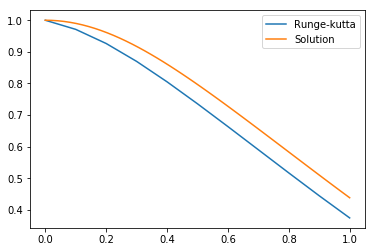

In [14]:
import matplotlib.pyplot as plt

X_SOLUTION = np.linspace(a, b)
Y_SOLUTION = []

for i in X_SOLUTION:
    Y_SOLUTION.append(Sol_F_X(i))


plt.plot(X_val, Y_val, label='Runge-kutta')

plt.plot(X_SOLUTION, Y_SOLUTION, label='Solution')

plt.legend()

### Метод Адамса второго порядка

In [15]:
eps = 0.0001

y0 = 1
x0 = 0

a = 0
b = 1

h0 = eps ** (1 / 2)
n5 = int((b - a) / h0)


while n5 % 2 != 0:
    n5 += 1
    h0 = (b - a) / (n5)


print('n: ' + str(n5))
print('h0: ' + str(h0))

n: 100
h0: 0.01


In [16]:
y1 = y0
x1 = x0

while True:
    h = h0
    h2 = 2 * h0

    y_2 = y0 + F_X(x0, y0) * h   
    
    y_2 += h / 2 * (3 * F_X(x0 + h, y_2) - F_X(x0, y0)) 
    
    #-----------------------------------------------
    
    y1 = y0 + F_X(x0, y0) * h2
    
    if 1 / 3 * abs(y_2 - y1) < eps and n5 % 2 == 0:
        break
    
    n5 += 1
    h0 = (b - a) / (n5)
    
print('Количество участков: ' + str(n5))    
print('Точный шаг: ' + str(h0))

Количество участков: 100
Точный шаг: 0.01


In [17]:
Adams_Y = [y0, y0 + h0 * F_X(x0, y0)]
Adams_X = [x0, x0 + h0]

for i in range(2, n5 + 1):
    yi = Adams_Y[i - 1] + h0 / 2 * (3 * F_X(Adams_X[i - 1], Adams_Y[i - 1]) 
                                    - F_X(Adams_X[i - 2], Adams_Y[i - 2]))
    
    Adams_Y.append(yi)
    Adams_X.append(Adams_X[i - 1] + h0)
    

# Non explicit

Adams_Y2 = [y0, y0 + h0 * F_X(x0, y0) ]
Adams_X2 = [x0, x0 + h0]

for i in range(1, n5):
    predictor = Adams_Y2[i] + h0 / 2 * (3 * F_X(Adams_X2[i], Adams_Y2[i]) - F_X(Adams_X2[i - 1], Adams_Y2[i - 1]))
    Adams_X2.append(Adams_X2[i] + h0)
    
    Adams_Y2.append(Adams_Y2[i] + h0 / 2 * (F_X(Adams_X2[i], Adams_X2[i]) + F_X(Adams_X2[i + 1], predictor)))
        
    
Y_val_next_adams = []

temp = a

for i in range(0, n5 + 1):
    Y_val_next_adams.append(Sol_F_X(temp))
    temp += h0

Y_adams_delta_expl = []
Y_adams_delta_non_expl = []


    
for i in range(0, len(Adams_Y)):
    Y_adams_delta_expl.append(abs(Adams_Y[i] - Y_val_next_adams[i]))
    Y_adams_delta_non_expl.append(abs(Adams_Y2[i] - Y_val_next_adams[i]))

    
d = {'Xi': Adams_X, 
     'Yi expl': Adams_Y,  
     'Yi non expl': Adams_Y2,
     'Y^i': Y_val_next_adams,
     '|Yi - Y^i expl|': Y_adams_delta_expl,
     '|Yi - Y^i non expl|': Y_adams_delta_non_expl}

df = pd.DataFrame(data=d)

df

,Xi,Yi expl,Yi non expl,Y^i,|Yi - Y^i expl|,|Yi - Y^i non expl|
0,0.00,1.000000,1.000000,1.000000,0.000000e+00,0.000000
1,0.01,1.000000,1.000000,0.999900,9.999000e-05,0.000100
2,0.02,0.999700,0.999799,0.999600,9.987009e-05,0.000199
3,0.03,0.999200,0.999496,0.999101,9.963074e-05,0.000395
4,0.04,0.998502,0.999088,0.998403,9.927296e-05,0.000685
5,0.05,0.997605,0.998574,0.997506,9.879824e-05,0.001068
6,0.06,0.996511,0.997953,0.996413,9.820856e-05,0.001540
7,0.07,0.995221,0.997222,0.995124,9.750637e-05,0.002098
8,0.08,0.993737,0.996382,0.993641,9.669455e-05,0.002741
9,0.09,0.992061,0.995430,0.991965,9.577643e-05,0.003465


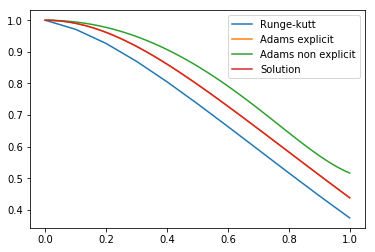

In [18]:
plt.plot(X_val, Y_val, label='Runge-kutt')

plt.plot(Adams_X, Adams_Y, label='Adams explicit')

plt.plot(Adams_X2, Adams_Y2, label='Adams non explicit')

plt.plot(X_SOLUTION, Y_SOLUTION, label = 'Solution')

plt.legend()

## 7. Найти решение задачи Коши на отрезке [0, 1] методом Эйлера. Построить на одном графике с п.6 приближенную интегральную кривую.

In [19]:
h0 = 0.1
y1 = y0
x1 = x0

while True:
    h = h0
    h2 = 2 * h0

    y_2 = y0 + F_X(x0, y0) * h   
    
    y_2 += h * F_X(x0 + h, y_2)
    
    #-----------------------------------------------
    
    y1 = y0 + F_X(x0, y0) * h2
    
    if 1 / 3 * abs(y_2 - y1) < eps and n5 % 2 == 0:
        break
    
    n5 += 1
    h0 = (b - a) / (n5)
    
print('Количество участков: ' + str(n5))    
print('Точный шаг: ' + str(h0))

Количество участков: 102
Точный шаг: 0.00980392156862745


In [20]:
Euler_Y = [y0, y0 + h0 * F_X(x0, y0)]
Euler_X = [x0, x0 + h0]


for i in range(1, n5):
    Euler_Y.append(Euler_Y[i] + h0 * F_X(Euler_Y[i], Euler_X[i]))
    Euler_X.append(Euler_X[i] + h0)

    
Y_val_next_euler = []

temp = a

for i in range(0, n5 + 1):
    Y_val_next_euler.append(Sol_F_X(temp))
    temp += h0
    
    
euler_delta = []
    
for i in range(0, len(Euler_Y)):
    euler_delta.append(abs(Euler_Y[i] - Y_val_next_euler[i]))
    
        
d = {'Xi': Euler_X, 
     'Yi': Euler_Y,  
     'Y^i': Y_val_next_euler, 
     '|Yi - Y^i|': euler_delta }

df = pd.DataFrame(data=d)

df
    

,Xi,Yi,Y^i,|Yi - Y^i|
0,0.000000,1.000000,1.000000,0.000000
1,0.009804,1.000000,0.999904,0.000096
2,0.019608,0.999808,0.999616,0.000192
3,0.029412,0.999424,0.999136,0.000288
4,0.039216,0.998848,0.998464,0.000383
5,0.049020,0.998081,0.997603,0.000478
6,0.058824,0.997124,0.996552,0.000572
7,0.068627,0.995978,0.995312,0.000665
8,0.078431,0.994644,0.993886,0.000758
9,0.088235,0.993123,0.992275,0.000849


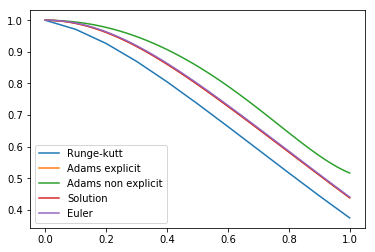

In [21]:
plt.plot(X_val, Y_val, label='Runge-kutt')

plt.plot(Adams_X, Adams_Y, label='Adams explicit')

plt.plot(Adams_X2, Adams_Y2, label='Adams non explicit')

plt.plot(X_SOLUTION, Y_SOLUTION, label = 'Solution')

plt.plot(Euler_X, Euler_Y, label = 'Euler')

plt.legend()

## 8. Найти точное решение задачи Коши. Сравнить точное решение с приближенными. Найти максимумы модулей отклонений в узловых точках приближенного решения от точного. 

Нахождение точного решения на [wolframAlpha](https://www.wolframalpha.com/input/?i=solve+y%60%2B2xy%3D2x%5E3*y%5E3,y%5B0%5D%3D1)

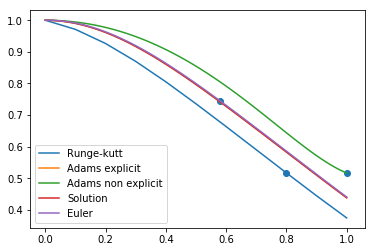

In [22]:
max_deltaX = []
max_deltaY = []

temp_max = None
temp_x = None
temp_y = None

for i in range(0, len(X_val)):
    if (temp_max is None or abs(Y_val[i] - Sol_F_X(X_val[i])) > temp_max):
        temp_x = X_val[i]
        temp_y = Y_val[i]
        temp_max = abs(Y_val[i] - Sol_F_X(X_val[i]))

max_deltaX.append(temp_x)
max_deltaY.append(temp_y)

temp_max = None

for i in range(0, len(Adams_X2)):
    if (temp_max is None or abs(Adams_Y2[i] - Sol_F_X(Adams_X2[i])) > temp_max):
        temp_x = Adams_X2[i]
        temp_y = Adams_Y2[i]
        temp_max = abs(Adams_Y2[i] - Sol_F_X(Adams_X2[i]))

max_deltaX.append(temp_x)
max_deltaY.append(temp_y)

temp_max = None

for i in range(0, len(Euler_X)):
    if (temp_max is None or abs(Euler_Y[i] - Sol_F_X(Euler_X[i])) > temp_max):
        temp_x = Euler_X[i]
        temp_y = Euler_Y[i]
        temp_max = abs(Euler_Y[i] - Sol_F_X(Euler_X[i]))

max_deltaX.append(temp_x)
max_deltaY.append(temp_y)


plt.plot(X_val, Y_val, label='Runge-kutt')

plt.plot(Adams_X, Adams_Y, label='Adams explicit')

plt.plot(Adams_X2, Adams_Y2, label='Adams non explicit')

plt.plot(X_SOLUTION, Y_SOLUTION, label = 'Solution')

plt.plot(Euler_X, Euler_Y, label = 'Euler')

plt.scatter(max_deltaX, max_deltaY)

plt.legend()